# Week 5 (SVM, Tree-based Models)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
import seaborn as sns


- SVC (Classification)
- SVR (Regression)

## 1.1 Hard Margin Classifier

### Q1.1 Hard Margin Classifier란? :

In [ ]:
# 데이터셋 생성
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])

### Q1.2 위 데이터셋을 2차원의 좌표평면에 시각화해주세요.

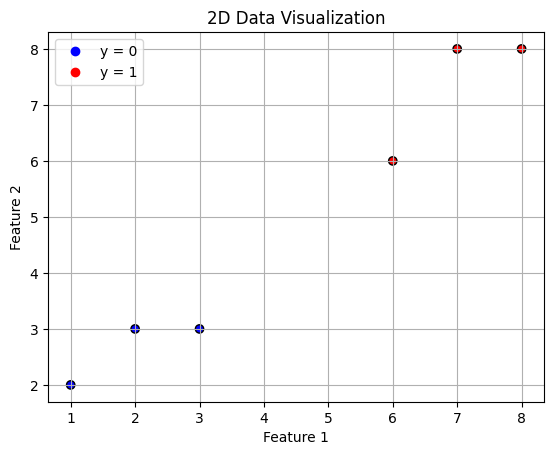

In [ ]:
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k', label = 'y') #plt.scatter의 값을 반환
handles, labels = scatter.legend_elements(prop="colors")
#legned_elements는 Collection 객체(scatter plot 등등)에서 범례를 생성
# prop은 범례를 생성할 기준이 되는 속성을 지정
labels = ['y = 0', 'y = 1']
plt.legend(handles, labels)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data Visualization')
plt.grid(True)
plt.show()

In [ ]:
# Hard Margin SVM 모델 학습
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Q1.3 하단 w와 b는 모델 학습으로 찾아낸 Wx+b의 계수와 상수항입니다. w와 b를 정의해주세요.

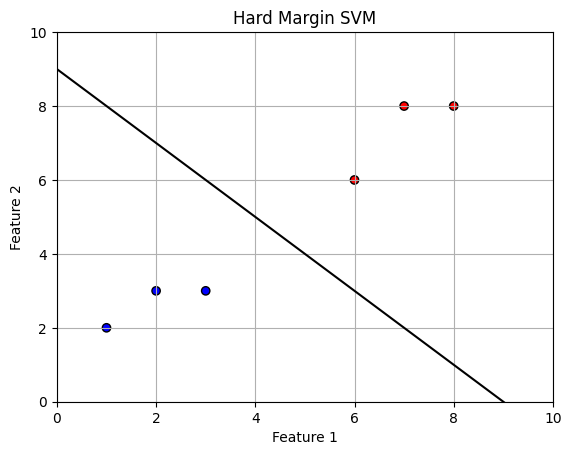

In [ ]:
# 결정 경계 시각화
w = model.coef_[0]
# w(coefficent)는 (1,2)의 형태로 반환됨. 1은 결정경계면의 수를 의미하고 2는 두개의 feature를 의미함
# 위의 설명은 binary classification, lienar kernel에서 비롯된 것임.
# 아래의 x_plot을 표현하고자 [0]으로 결정경계면 1개에 대한 (0번째 결정경계면에 대한) coef를 할당한다.
b = model.intercept_[0]
# 위의 설명을 승계하여 0번째 결정경계면에 대한 intercept를 할당

x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1] #위의 계수에 대한 이야기의 연장선으로 w의 모양을 고려하여 지정해줘야함.(이 경우 위 코드에서 0번째 결정면만을 쓰기로 함.)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.grid(True)
plt.show()

## 1.2 Soft Margin Classifier

### Q2.1 Soft Margin Classifier란?

Hard Margin Classifier와 달리 데이터셋에 노이즈나 이상치가 존재하는 경우에도 어느 정도의 오차를 허용하여분류 경계를 생성하는 모델이다.


### Q2.2 Soft Margin의 정의를 떠올리며, 노이즈가 추가된 데이터셋을 생성해주세요. (2개 이상 추가 생성 필요)

In [ ]:
# 데이터셋 생성 (약간의 노이즈 추가)
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8], [2, 5], [3, 6]])
y = np.array([0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
# Soft Margin SVM 모델 학습
model = SVC(kernel='linear', C=1.0) # C 가 작으므로 Soft Margin SVM
model.fit(X, y)

SVC(kernel='linear')

### Q2.3 마진을 산출해 시각화하고, Support Vector을 찾아주세요.

하단 그림은 예시로, 꼭 똑같이 출력되지 않아도 됩니다.

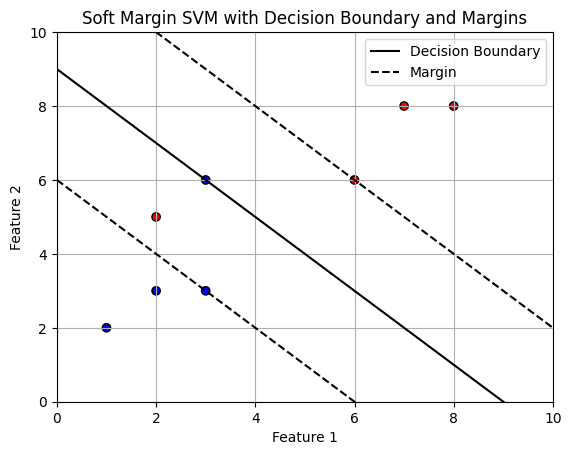

In [ ]:
# 결정 경계 시각화
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# 마진 경계 계산
margin = 1/ np.linalg.norm(w) # vector norm 으로 마진 경계를 계산함.
y_margin_positive = -(w[0] * x_plot + b-1) / w[1]
y_margin_negative = -(w[0] * x_plot + b+1) / w[1]

# 마진 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.plot(x_plot, y_margin_positive, 'k--', label='Margin')
plt.plot(x_plot, y_margin_negative, 'k--')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()

## 1.3 프로젝트 (SVC)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

### **Linear SVC**

In [ ]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1
clf = SVC(kernel = "linear", C=C)
Model_kernel_linear = clf.fit(X,y)

Model_kernel_linear

SVC(C=1, kernel='linear')

In [ ]:
y_pred = Model_kernel_linear.predict(X) # 학습 데이터의 재예측 (실습용)
confusion_matrix(y, y_pred) # 따라서, 분류 결과가 상당히 정확할 수밖에 없음을 감안해야 함

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

### Q3.1 위 예시처럼, 옵션을 linear로 설정해도 되지만, sklearn의 LinearSVC 함수를 사용해도 구현할 수 있습니다. LinearSVC로 재구현해주세요.

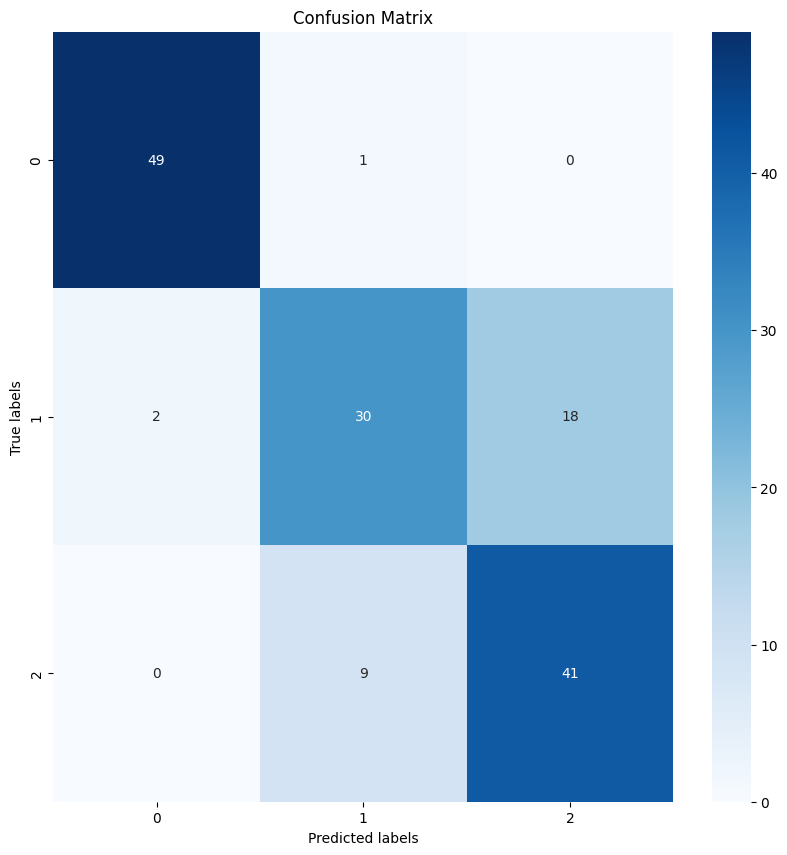

In [ ]:
import sklearn.svm as svm
from sklearn.svm import LinearSVC

clf_linear = LinearSVC(C=C)
Model_linear = clf_linear.fit(X,y)


y_pred = clf_linear.predict(X)
lienarSVC_confusion=confusion_matrix(y, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(lienarSVC_confusion,cmap = 'Blues', annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### **Kernal SVC**

### Q3.2 Kernel SCV - non-linear한 형태의 SVM을 하나 이상 구현해주세요. 동일하게, 학습데이터를 predict하여 confusion matrix를 구해주세요.

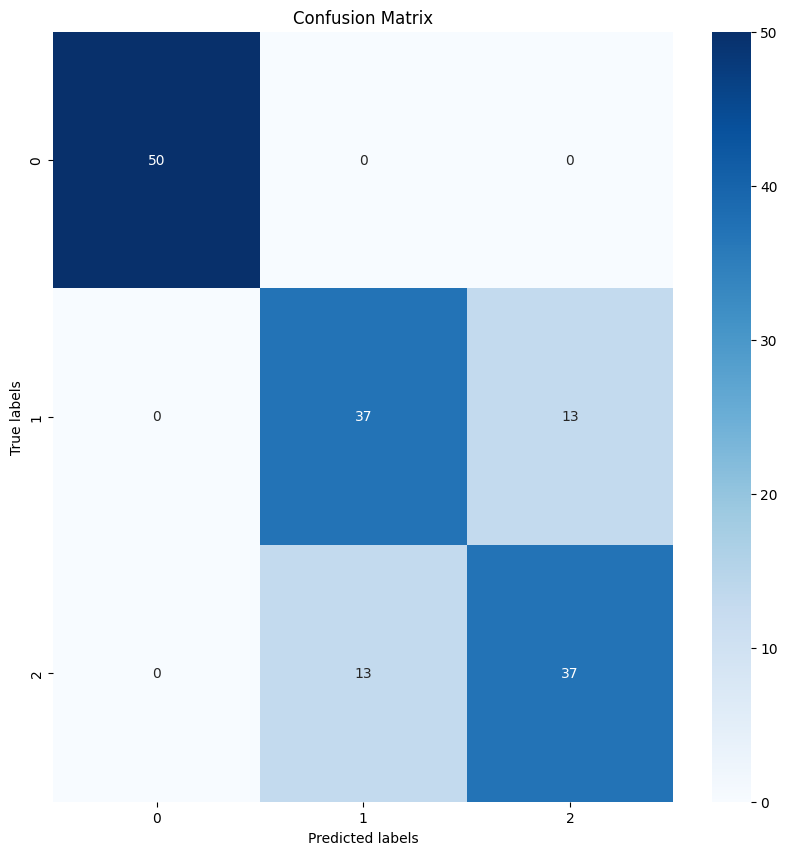

In [ ]:
clf_rbf = SVC(kernel = "rbf",gamma=0.7, C=C) #Radial Basis Function
model_rbf = clf_rbf.fit(X,y)

y_pred = clf_rbf.predict(X)
rbfSVC_confusion=confusion_matrix(y, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(rbfSVC_confusion, cmap = 'Blues', annot =True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

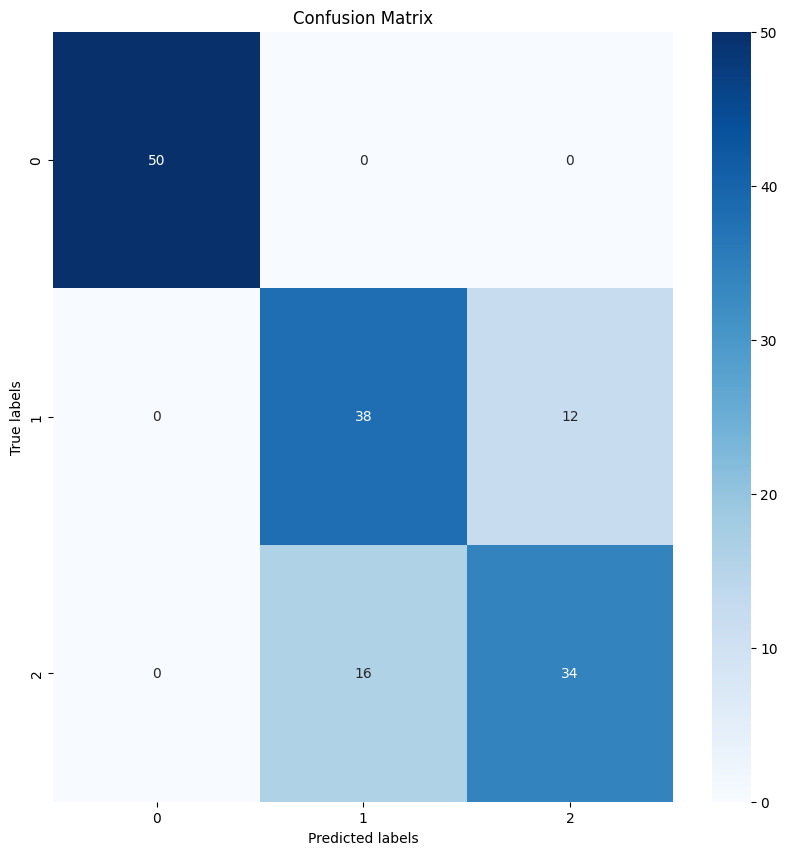

In [ ]:
clf_poly = SVC(kernel = "poly",gamma='auto', C=C, degree =3) #Radial Basis Function
model_poly = clf_poly.fit(X,y)

y_pred = clf_poly.predict(X)
polySVC_confusion=confusion_matrix(y, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(polySVC_confusion, cmap = 'Blues', annot =True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

### 시각화

### Q3.3 아래 예시 plot처럼, linear model과 non-linear 모델의 시각화 결과를 출력해주세요.

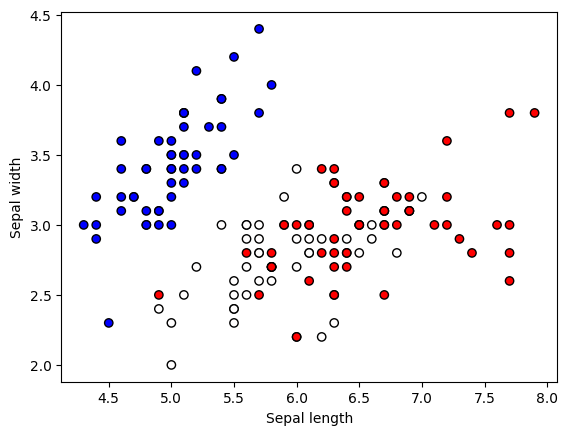

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y, cmap='bwr', edgecolors='k', label='y')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

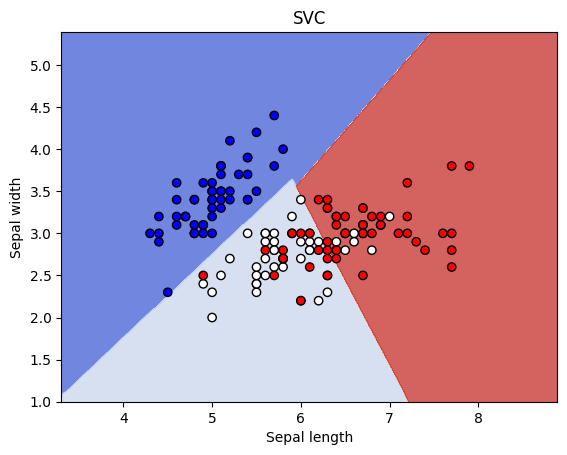

In [ ]:
# meshgrid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# predict on meshgrid
Z = Model_kernel_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# plot data points
plt.scatter(X[:,0],X[:,1],c=y, cmap='bwr', edgecolors='k', label='y')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVC')

plt.show()



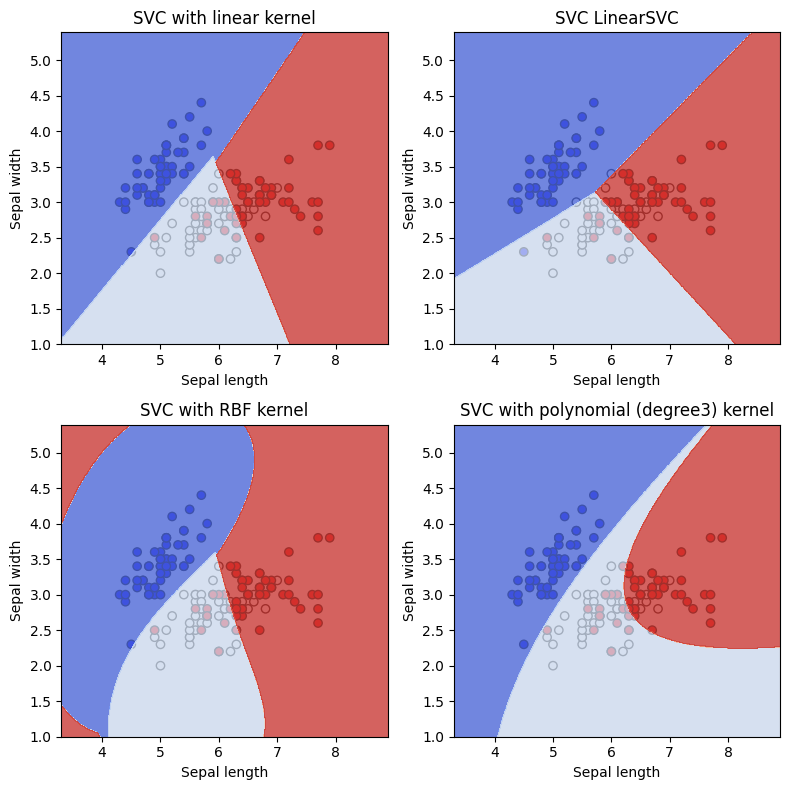

In [ ]:
# Define subplots
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(8,8))

# Creat model array
models = []
models.append(Model_kernel_linear)
models.append(clf_linear)
models.append(model_rbf)
models.append(model_poly)

# loop for subplots
for idx, model_name in enumerate(['with linear kernel','LinearSVC','with RBF kernel','with polynomial (degree3) kernel']):
  # each subplot's basic setting
  axes[idx//2, idx%2].scatter(X[:,0],X[:,1],c=y, cmap='bwr', edgecolors='k', label='y')
  axes[idx//2, idx%2].set_xlabel('Sepal length')
  axes[idx//2, idx%2].set_ylabel('Sepal width')
  axes[idx//2, idx%2].set_title(f'SVC {model_name}') if model_name != 'linear SVC' else axes[idx//2, idx%2].set_title(f'{model_name}')

  # each subplot's meshgrid for decision boudnaries
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  # predict on meshgrid using models array
  Z = models[idx].predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # plot decision boundary
  axes[idx//2, idx%2].contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

plt.tight_layout()
plt.show()




## 2.1. Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 로드 및 전처리
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Q1.1 max_depth 파라미터를 변경하면 트리의 구조와 성능이 어떻게 변할까요?

In [ ]:
# 결정 트리 모델 생성 및 학습

tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=2, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

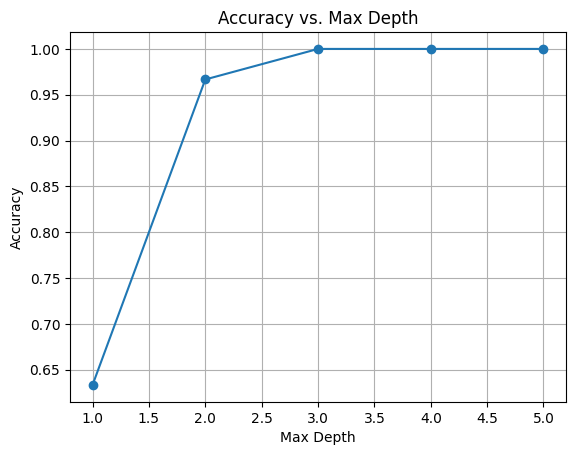

In [ ]:
from sklearn.metrics import accuracy_score

max_depths = [1,2,3,4,5]
accuracies =[]
for max_depth in max_depths:
  tree_model = DecisionTreeClassifier(criterion='gini', max_depth = max_depth,
                                      min_samples_leaf=2, random_state=42)
  tree_model.fit(X_train, y_train)

  y_pred = tree_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

plt.plot(max_depths, accuracies, marker ='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.grid(True)
plt.show()

### Q1.2 'gini'와 'entropy' 기준의 차이는 무엇이며, 결과에 어떤 영향을 미칠까요?

* gini index : 불순도를 의미하며 데이터가 잘못 분류될 확률을 의미한다. 지니 불순도는 가장 빈도가 높은 클래스를 분리하는 경향이 있다.
* entropy : 노드의 불확실성을 나타냄. 엔트로피는 모든 클래스를 균등하게 분리하는 경향이 있다.

일반적으로 지니 불순도는 계산이 빨라 큰 데이터셋에 적합하고, 엔트로피는 불확실성을 더 정확하게 측정하기 때문에 작은 데이터넷에 적합할 수 있다. 다만 결과에 있어서는 거의 비슷한 결과를 만든다.


### Q1.3 각 노드의 분할 기준 어떻게 되는지 설명해보세요.

In [ ]:
# 트리 시각화 (Graphviz)
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

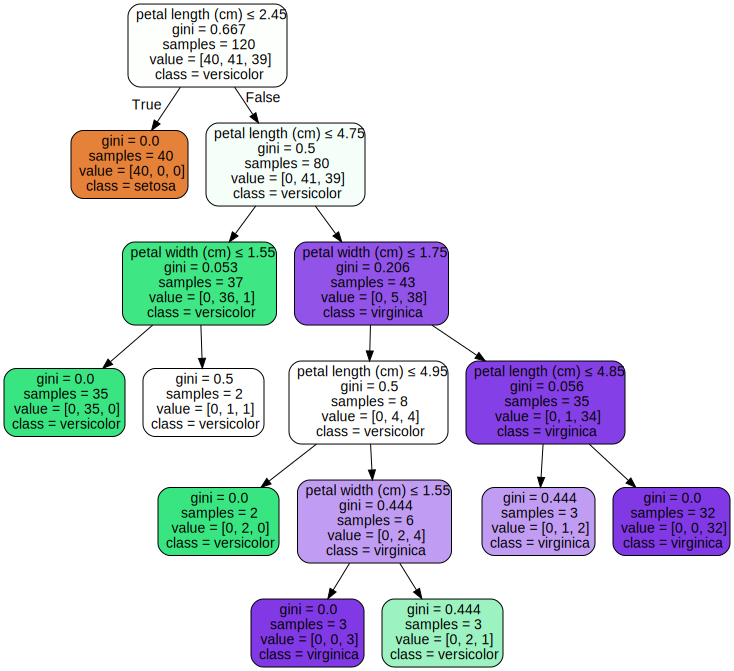

In [ ]:

# 그래프 출력
graph = graphviz.Source(dot_data)
graph
# 오 신기하네

## 3. 앙상블 학습: 부스팅(Boosting) 모델

Adaboost, Gradient Boosting Model은 scikit learn에서 지원하지만, LightGBM과 XGBoost의 경우는 외부 패키지를 불러와야 합니다.

Boosting 계열의 모델들은 데이터 개수가 적으면
**overfitting이 일어나는 경우가 많으니, 주의**해야 합니다.

In [ ]:
# 필요한 패키지 로드
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()

In [ ]:
# 데이터 로드
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(housing_df.columns)

print(housing_df.describe())


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean      

In [ ]:
housing_df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


### Q3.1 `housing_df`를 train, test split을 해봅시다.

분할 비율을 자유롭게 설정해봅시다.

In [ ]:
# 데이터 분할
X = housing_df.drop(columns=['MedHouseVal'])
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=42)

### Q3.2  데이터를 `RandomForestRegressor`에 적합해 봅시다.
train set 에 대해 `MedHouseVal`을 종속변수, 나머지를 독립변수로 하는 random forest regressor를 적합해 봅시다.

test set으로 prediction을 한 후 MSE를 구해 봅시다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state =42)
forest = model.fit(X_train, y_train)

y_pred= forest.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')

MSE: 0.2553684927247781


### Q3.3 데이터를 `AdaBoostRegressor`에 적합해봅시다.

위와 동일

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')

MSE: 0.614478459432694


### Q3.4 데이터를 `GradientBoostingRegressor`에 적합해 봅시다.

위와 동일

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')

MSE: 0.2939973248643864


### Q3.5 데이터를 `lightgbm` 회귀에 적합해 봅시다.

파라미터를 자세히 살펴보고, 자유롭게 설정해 봅시다.

Documentation
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

예시
https://www.geeksforgeeks.org/regression-using-lightgbm/


In [ ]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'boosting_type' : 'gbdt',
    'num_leaves' : 31,
    'learning_rate' : 0.05,
    'feature_fraction' : 0.9
}

model = lgb.train(params, train_data, valid_sets= [test_data])

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
MSE: 0.23125380212831073


### Q3.6 데이터를 `xgboost`에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다

In [ ]:
import xgboost as xgb

train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree' : 0.8

}

num_rounds =100
model = xgb.train(params, train_data, num_rounds)

y_pred = model.predict(test_data)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 0.21912447597241605


### Q3.7 `RandomForestRegressor`의 feature importance를 시각화해봅시다.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

위를 참고해보면서 Q2에서 적합한 random forest regressor의 feature importance를 시각화해 봅시다.

중요한 feature 부터 내림차순으로 시각화해 봅시다.

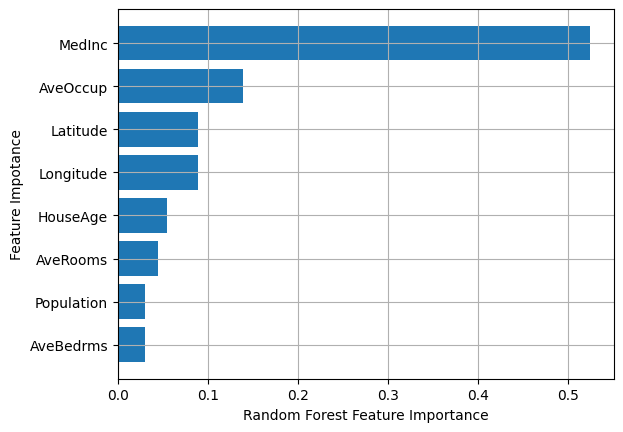

In [ ]:
feature_names = X.columns

importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

forest_importances = forest_importances.sort_values(ascending=True)

plt.barh(forest_importances.index, forest_importances)
plt.xlabel('Random Forest Feature Importance')
plt.ylabel('Feature Impotance')
plt.grid(True)
plt.show()

### (BONUS) 1. Boosting 모델 각각의 특징을 정리해보세요. 2. 모델 성능을 높이기 위하여 어떤 시도를 하면 좋을지 고민해보세요.

* Random Forest Regressor
  - 여러개의 Decision Tree를 조합하여 예측을 수행하는 앙상블 모델이다.
  - 피쳐 간 상호작용이 많은 경우에 유리하다.
  - 과적합에 강하고, feature importance를 쉽게 계산할 수 있다.
* AdaBoost Regressor
  - 부스팅 기벙을 사용하여 약한 학습기를 순차적으로 결합하여 strong learner를 만듦.
  - 데이터의 가중치를 조정하여 잘못 예측된 샘플에 더 큰 가중치를 부여하는 방식이다.
  - 데이터의 분포가 불균형하거나 특정 피쳐가 다른 피쳐 대비 큰 영향을 미치는 경우에 유리하다.
* Gradient Boosting Regressor
  - 잔차를 기반으로 학습한다. 이전 모델의 오차를 weak learner들이 보완하며 학습한다.
  - 복잡한 비선형 관계를 가진 데이터에 적합하다.
  - 잔차를 잘 설명할 수 있는 경우에 유리하다.(다만 학습 시간이 오래걸리다.)
* lightgbm
  - Gradient Boosting을 기반으로 학습 속도와 메모리 효율을 높였다.
  - 대규모 데이터셋에 적합하며, 특히 빠른 학습 속도가 필요한 경우 유리하다.
* xgboost
  - Gradient Boosting을 병렬처리로 구현하여 학습속도를 높였다.
  - 대규모 데이터셋에 적합하며, 특히 빠른 학습 속도가 필요한 경우 유리하다.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


hyper_model = RandomForestRegressor(random_state =42)

param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [5,10],
    'min_samples_split' : [5,10],
    'min_samples_leaf' : [5,10]
}

grid_search = GridSearchCV(
    estimator = hyper_model,
    param_grid =param_grid,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

hyper_forest = grid_search.best_estimator_

y_pred= hyper_forest.predict(X_test)

post_mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {post_mse}')

KeyboardInterrupt: 